# projet optimisation: compte rendu sur la phase 1 et 2

Réalisé par:  
 -Touzari Lisa  
 -Lekhmamra Chihab Eddine  
 -Ghemmour Yacine


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from fonctions import HQ,droites,gradient,dJ,J,psi,HJ,newton


(-1.0, 1.0)

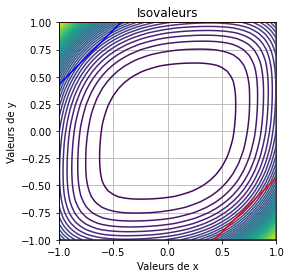

In [23]:
#partie1
#•données en entrée 
A=[1,0,0.7]
B=[0,1,-0.7]
C=[0,0,0]    
gamma=[5,5,5]
Nh=3

# Définition du domaine de tracé
xmin, xmax, nx = -1, 1, 41
ymin, ymax, ny = -1, 1, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

# Tracé des isovaleurs de HQ et des droites englobantes
nIso = 50
plt.contour(x2d,y2d,HQ(x2d,y2d,A,B,C,gamma,Nh),nIso)
for j in range(Nh):
    droites(x1d,A[j],B[j],C[j])
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)


(-1.0, 1.0)

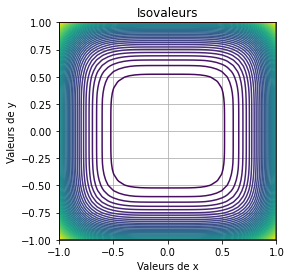

In [24]:
# tracés d'hyperquadriques avec des paramètres différents du premier exemple
# variation de Nh

Nh1=2

# Tracé des isovaleurs de HQ et des droites englobantes
plt.contour(x2d,y2d,HQ(x2d,y2d,A,B,C,gamma,Nh1),nIso)
for j in range(Nh1):
    droites(x1d,A[j],B[j],C[j])
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)

remarque: quand Nh augmente, le nombre de segments de HQ augmente.Le nombre de droite englobantes est égale à 2* Nh ce qui implique que plus Nh augmente plus on a de droites.


(-1.0, 1.0)

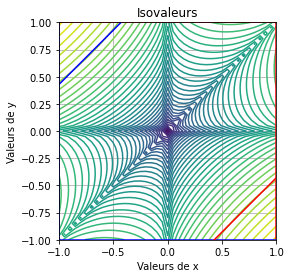

In [25]:
# variation de gamma
gamma1=[0.5,0.5,0.5]
# Tracé des isovaleurs de HQ et des droites englobantes
plt.contour(x2d,y2d,HQ(x2d,y2d,A,B,C,gamma1,Nh),nIso)
for j in range(Nh):
    droites(x1d,A[j],B[j],C[j])
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)

remarque: le gamma modifie la forme de l’hyperquadrique et on constate que lorsque gamma <1 la forme se rétrécie et des concavités se créent. 

(-1.0, 1.0)

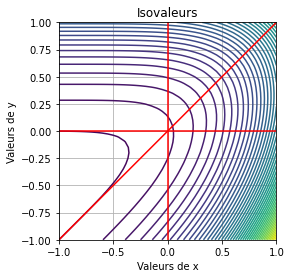

In [26]:
# variation de c
C1=[1,1,1]
# Tracé des isovaleurs de HQ et des droites englobantes
plt.contour(x2d,y2d,HQ(x2d,y2d,A,B,C1,gamma,Nh),nIso)
for j in range(Nh):
    droites(x1d,A[j],B[j],C1[j])
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)

remarque: le paramètre C permet de décaler le centre des isovaleurs. 

(-1.0, 1.0)

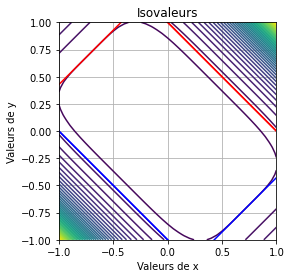

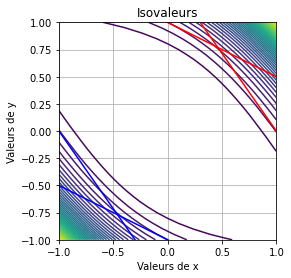

In [27]:
# variation de A et B
A1=[1,1,-0.7]
B1=[1,1,0.7]

# Tracé des isovaleurs de HQ et des droites englobantes
plt.figure(1)
plt.contour(x2d,y2d,HQ(x2d,y2d,A1,B1,C,gamma,Nh),nIso)
for j in range(Nh):
    droites(x1d,A1[j],B1[j],C[j])
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)

A2=[1,0.5,0]
B2=[0.7,1,0.8]

# Tracé des isovaleurs de HQ et des droites englobantes
plt.figure(2)
plt.contour(x2d,y2d,HQ(x2d,y2d,A2,B2,C,gamma,Nh),nIso)
for j in range(Nh):
    droites(x1d,A2[j],B2[j],C[j])
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)


remarque: le paramètre A et B permettent de contrôler le diamètre de l’isovaleur située entre les droites englobantes.

Point de départ: a_ini= 0.0 - b_ini= -0.25
Point d'arrivée a_fin= 0.8034558237647493 - b_fin= -0.373716016677282
convergence= False
n_iter= 107
valeur finale du critère 0.29533964040057886


(-1.0, 1.0)

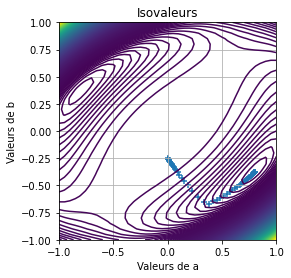

In [28]:
#partie2
#methode du gradient
with open('Data_HQ_Ph1et2.csv', 'r') as f:
    data = np.array([[float(e) for e in row] for row in csv.reader(f, delimiter=',', quoting=csv.QUOTE_NONE)])
    
x=data[0]    
y=data[1]

a0=0.0
b0=-0.25
eps=0.000001
nmax=200
alpha=0.004

result,prec=gradient(x,y,a0,b0,nmax,alpha,eps)

print('Point de départ: a_ini=',a0,'- b_ini=',b0)
print("Point d'arrivée a_fin=",result[0][-1],'- b_fin=',result[1][-1])
print('convergence=',prec)
print('n_iter=',np.size(result[0]))

#la valeur du critère
print("valeur finale du critère",J(x,y,result[0][-1],result[1][-1]))
a=[result[0][-1],1]
b=[result[1][-1],1]
c=[0,0]   
gamma=[4,4]
Nh=2

#tracé des isovaleurs de J dans le plan(a,b)
# Définition du domaine de tracé
amin, amax, na = -1, 1, 41
bmin, bmax, nb = -1, 1, 41
# Discrétisation du domaine de tracé
a1d = np.linspace(amin,amax,na)
b1d = np.linspace(bmin,bmax,nb)
a2d, b2d = np.meshgrid(a1d,a1d)
nIso=1000
plt.contour(a2d,b2d,J(x,y,a2d,b2d),nIso)
plt.scatter(result[0],result[1],marker = '+')
plt.title('Isovaleurs')
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)



remarque: on constate d'après les isovaleurs tracées qu'on peut avoir 2 minimum, donc des valeurs de (a,b) différentes.

Point de départ: a_ini= 1 - b_ini= -0.5
Point d'arrivée a_fin= 0.8034599754706256 - b_fin= -0.3737117514813793
n_iter= 8
valeur finale du critère 0.29533963980762185


(-1.0, 1.0)

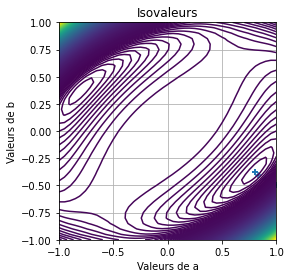

In [29]:
#la methode de newton
a0=1
b0=-0.5
X0=np.array([[a0],[b0]])
Xn=newton(X0,eps,nmax,x,y)
print('Point de départ: a_ini=',a0,'- b_ini=',b0)
print("Point d'arrivée a_fin=",Xn[0][-1],'- b_fin=',Xn[1][-1])
print('n_iter=',np.size(Xn[0]))

#la valeur du critère
print("valeur finale du critère",J(x,y,Xn[0][-1],Xn[1][-1]))

plt.contour(a2d,b2d,J(x,y,a2d,b2d),nIso)
plt.scatter(Xn[0],Xn[1],marker = '+')
plt.title('Isovaleurs')
plt.xlabel('Valeurs de a')
plt.ylabel('Valeurs de b')
plt.grid()
plt.axis('square')
plt.xlim(-1,1)
plt.ylim(-1,1)

(-1.5, 1.5)

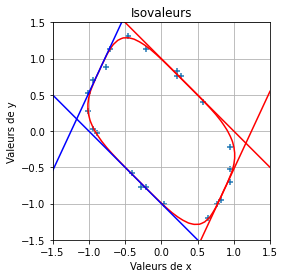

In [30]:
#le contour HQ
# Définition du domaine de tracé
xmin, xmax, nx = -1.5, 1.5, 41
ymin, ymax, ny = -1.5, 1.5, 41
# Discrétisation du domaine de tracé
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d,y1d)



# Tracé de HQ et des droites englobantes
plt.contour(x2d,y2d,HQ(x2d,y2d,a,b,c,gamma,Nh),[0],colors=['r'])
plt.scatter(x,y,marker = '+')

for j in range(Nh):
    droites(x1d,a[j],b[j],c[j])
    
plt.title('Isovaleurs')
plt.xlabel('Valeurs de x')
plt.ylabel('Valeurs de y')
plt.grid()
plt.axis('square')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)


on peut remarquer que l'hyperquadrique passe par un maximum de points(x,y).